<a href="https://www.kaggle.com/code/alyeko/crop-classification-from-drone-imagery-pytorch?scriptVersionId=107517207" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing packages

In [2]:
!pip install radiant_mlhub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.1/146.1 kB 1.6 MB/s eta 0:00:00a 0:00:01


In [99]:
import os
import PIL
import json 
import shutil
import pandas as pd
from pathlib import Path
from radiant_mlhub import Dataset, Collection #Collection module will be used for viewing collection ids


## Downloading the data

In [30]:
os.environ['MLHUB_API_KEY'] = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' #api key goes here. Get your api key by signing up at https://mlhub.earth/ and creating an api key
# for dataset in Dataset.list():
#     print(f'{dataset.id:<32}: {dataset.title}')

for dataset in Dataset.list():
    if 'rti_rwanda_crop_type' in dataset.id:
        print(f'{dataset.id}     :    {dataset.title}')

rti_rwanda_crop_type     :    Drone Imagery Classification Training Dataset for Crop Types in Rwanda


In [31]:
rwanda_dataset = Dataset.fetch('rti_rwanda_crop_type')
print(rwanda_dataset.collection_descriptions)

[{'id': 'rti_rwanda_crop_type_labels', 'types': ['labels'], 'license': '[CC-BY-NC-SA-4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)'}, {'id': 'rti_rwanda_crop_type_source', 'types': ['source_imagery'], 'license': '[CC-BY-NC-SA-4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)'}, {'id': 'rti_rwanda_crop_type_raw', 'types': ['source_imagery'], 'license': '[CC-BY-NC-SA-4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)'}]


In [32]:
print(len(rwanda_dataset.collection_descriptions), '\n')
rwanda_dataset.collections

3 



[<Collection id=rti_rwanda_crop_type_labels>, <Collection id=rti_rwanda_crop_type_source>, <Collection id=rti_rwanda_crop_type_raw>]

In [33]:
print(f'Going to be using {rwanda_dataset.collections[0]} and {rwanda_dataset.collections[1]}')

Going to be using <Collection id=rti_rwanda_crop_type_labels> and <Collection id=rti_rwanda_crop_type_source>


In [34]:
print(os.listdir('/kaggle'))

['lib', 'input', 'working']


In [70]:
#Downloading labels as well as source imagery, but we first need 
#to obtain the collection_id which we'll use to download the data
downloads_path = '/kaggle'

lcollection = Collection.fetch('rti_rwanda_crop_type_labels')
lcollection.download(f'{downloads_path}/Data')  #downloading the labels

scollection = Collection.fetch('rti_rwanda_crop_type_source')
scollection.download(f'{downloads_path}/Data')  #downloading the source imagery

  0%|          | 0/0.8 [00:00<?, ?M/s]

  0%|          | 0/104.5 [00:00<?, ?M/s]

PosixPath('/kaggle/Data/rti_rwanda_crop_type_source.tar.gz')

In [71]:
#Checking if the data was truly downloaded
os.listdir(f'{downloads_path}/Data')

['rti_rwanda_crop_type_source.tar.gz', 'rti_rwanda_crop_type_labels.tar.gz']

## Extracting the data

In [72]:
shutil.unpack_archive(f'{downloads_path}/Data/rti_rwanda_crop_type_labels.tar.gz', f'{downloads_path}/Extracted')
shutil.unpack_archive(f'{downloads_path}/Data/rti_rwanda_crop_type_source.tar.gz', f'{downloads_path}/Extracted')

print(sorted(os.listdir(f'{downloads_path}/Extracted/rti_rwanda_crop_type_source')))

In [73]:
#Checking if the data was truly extracted
print(os.listdir(f'{downloads_path}/Extracted'), '\n')

print(sorted(os.listdir(f'{downloads_path}/Extracted/rti_rwanda_crop_type_labels'))[:3])
print(sorted(os.listdir(f'{downloads_path}/Extracted/rti_rwanda_crop_type_source'))[:3], '\n')

print(len(os.listdir(f'{downloads_path}/Extracted/rti_rwanda_crop_type_labels')))
print(len(os.listdir(f'{downloads_path}/Extracted/rti_rwanda_crop_type_source')), '\n')

print(f'Actual labels in labels dir = {2608-2}') #(_common and collection.json folders)
print(f'Actual source images in sources dir = {2607-1} ') #(collection.json folder|)

['rti_rwanda_crop_type_source', 'rti_rwanda_crop_type_labels'] 

['_common', 'collection.json', 'rti_rwanda_crop_type_labels_0']
['collection.json', 'rti_rwanda_crop_type_source_0', 'rti_rwanda_crop_type_source_1'] 

2608
2607 

Actual labels in labels dir = 2606
Actual source images in sources dir = 2606 


In [74]:
labels_path = f"{downloads_path}/Extracted/rti_rwanda_crop_type_labels" #label files
sources_path = f"{downloads_path}/Extracted/rti_rwanda_crop_type_source" #source image files

In [75]:
source_images = []
for root, dirs, files in os.walk(sources_path):
    for file in files:
        if(file.endswith(".png")):
            source_images.append(root)

In [76]:
dataset_df = pd.DataFrame(data = source_images, columns=["source_file"])
dataset_df.head()

,source_file
0,/kaggle/Extracted/rti_rwanda_crop_type_source/...
1,/kaggle/Extracted/rti_rwanda_crop_type_source/...
2,/kaggle/Extracted/rti_rwanda_crop_type_source/...
3,/kaggle/Extracted/rti_rwanda_crop_type_source/...
4,/kaggle/Extracted/rti_rwanda_crop_type_source/...


In [79]:
dataset_df.loc[[0]].source_file[0]

'/kaggle/Extracted/rti_rwanda_crop_type_source/rti_rwanda_crop_type_source_1432'

In [80]:
# sample path to a source file
print(dataset_df["source_file"][0], '\n')
print(dataset_df["source_file"][0].split('_'))

/kaggle/Extracted/rti_rwanda_crop_type_source/rti_rwanda_crop_type_source_1432 

['/kaggle/Extracted/rti', 'rwanda', 'crop', 'type', 'source/rti', 'rwanda', 'crop', 'type', 'source', '1432']


In [83]:
os.listdir(labels_path)[:3]

['rti_rwanda_crop_type_labels_1955',
 'rti_rwanda_crop_type_labels_1548',
 'rti_rwanda_crop_type_labels_2529']

In [84]:
def get_label(source_file, labels_path):
    image_id = source_file.split('_')[-1]
    label_file = f"{labels_path}/rti_rwanda_crop_type_labels_{str(image_id)}/labels.json"
    #load label
    with open(label_file) as file:
        label = json.load(file)["label"]

    return label

In [85]:
#Adding label column to pandas and read the label for each source image
dataset_df["label"] = dataset_df["source_file"].apply(get_label, args=(labels_path,))
dataset_df.head()

,source_file,label
0,/kaggle/Extracted/rti_rwanda_crop_type_source/...,forest
1,/kaggle/Extracted/rti_rwanda_crop_type_source/...,forest
2,/kaggle/Extracted/rti_rwanda_crop_type_source/...,other
3,/kaggle/Extracted/rti_rwanda_crop_type_source/...,legumes
4,/kaggle/Extracted/rti_rwanda_crop_type_source/...,other


In [86]:
# Create target folder for each each label
# define a list of keywords based on the label classes ()
keys = (
    "banana",
    "maize",
    "other",
    "forest",
    "legumes",
    "structure"
)
if not os.path.isdir(f"{downloads_path}/Images/"):
    os.makedirs(f"{downloads_path}/Images/")
for key in keys:
    if not os.path.isdir(downloads_path + '/Images/' + key):
        os.mkdir(downloads_path + '/Images/' + key)

In [92]:
# copying source imagery to corresponding label folders

for key in keys:
    key_df = dataset_df[dataset_df["label"]==key]
    key_df = key_df.reset_index()
    for row in key_df.iterrows():
        shutil.copy(f"{row[1]['source_file']}/image.png", f"{downloads_path}/Images/{key}/{str(row[1]['index'])}.png")
        #the index of the image will be the name of the file

In [97]:
os.listdir('/kaggle/Images/banana')[:5]

['2394.png', '352.png', '2351.png', '693.png', '1975.png']

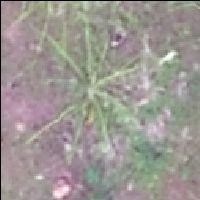

In [104]:
PIL.Image.open('/kaggle/Images/banana/693.png')

In [105]:
key_df.head()

,index,source_file,label
0,17,/kaggle/Extracted/rti_rwanda_crop_type_source/...,structure
1,20,/kaggle/Extracted/rti_rwanda_crop_type_source/...,structure
2,40,/kaggle/Extracted/rti_rwanda_crop_type_source/...,structure
3,48,/kaggle/Extracted/rti_rwanda_crop_type_source/...,structure
4,64,/kaggle/Extracted/rti_rwanda_crop_type_source/...,structure


### Data and Data Augmentation

### ResNet-9 model